In [42]:


import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 



In [4]:


ru_fix_demo = pd.read_csv("../Datasets/DataToUse/Ru_Fix_Demo.csv", )
print(ru_fix_demo.shape)
ru_fix_demo.head()


(184791, 21)


,Text_ID,Fix_X,Fix_Y,Fix_Duration,Word_Number,Word,Sentence,Language,SubjectID,L2_spelling_skill,...,vocab.t2.5,L2_lexical_skill,TOWRE_word,TOWRE_nonword,motiv,IQ,Age,Sex,Target_Ave,Target_Label
0,1,79,104,221,1,Samuel,"Samuel Morse, best k",ru,rum_1,4.431818,...,4.5,4.0625,3.798077,4.52381,3.7,7.0,30,0,4.144367,4.0
1,1,118,101,289,1,Samuel,"Samuel Morse, best k",ru,rum_1,4.431818,...,4.5,4.0625,3.798077,4.52381,3.7,7.0,30,0,4.144367,4.0
2,1,247,92,337,2,"Morse,","Samuel Morse, best k",ru,rum_1,4.431818,...,4.5,4.0625,3.798077,4.52381,3.7,7.0,30,0,4.144367,4.0
3,1,336,118,281,3,best,"Samuel Morse, best k",ru,rum_1,4.431818,...,4.5,4.0625,3.798077,4.52381,3.7,7.0,30,0,4.144367,4.0
4,1,416,125,250,4,known,"Samuel Morse, best k",ru,rum_1,4.431818,...,4.5,4.0625,3.798077,4.52381,3.7,7.0,30,0,4.144367,4.0


In [150]:


ru_fix_demo.columns



Index(['Text_ID', 'Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number', 'Word',
       'Sentence', 'Language', 'SubjectID', 'L2_spelling_skill',
       'L2_vocabulary_size', 'vocab.t2.5', 'L2_lexical_skill', 'TOWRE_word',
       'TOWRE_nonword', 'motiv', 'IQ', 'Age', 'Sex', 'Target_Ave',
       'Target_Label'],
      dtype='object')

In [ ]:

subject_ids = ru_fix_demo.SubjectID.unique()
print(subject_ids, len(subject_ids))



In [152]:

targets = ["Target_Label"]
indicator = ["SubjectID"]
features = ['Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number','motiv', 'IQ', 'Age', 'Sex',]
features



['Fix_X', 'Fix_Y', 'Fix_Duration', 'Word_Number', 'motiv', 'IQ', 'Age', 'Sex']

In [154]:


data = ru_fix_demo[indicator+features+targets]
data



,SubjectID,Fix_X,Fix_Y,Fix_Duration,Word_Number,motiv,IQ,Age,Sex,Target_Label
0,rum_1,79,104,221,1,3.7,7.0,30,0,4.0
1,rum_1,118,101,289,1,3.7,7.0,30,0,4.0
2,rum_1,247,92,337,2,3.7,7.0,30,0,4.0
3,rum_1,336,118,281,3,3.7,7.0,30,0,4.0
4,rum_1,416,125,250,4,3.7,7.0,30,0,4.0
...,...,...,...,...,...,...,...,...,...,...
184786,ru_55,388,585,151,145,3.4,8.0,29,1,4.0
184787,ru_55,480,585,170,145,3.4,8.0,29,1,4.0
184788,ru_55,589,584,196,146,3.4,8.0,29,1,4.0
184789,ru_55,643,588,147,147,3.4,8.0,29,1,4.0


In [155]:

correlations = data[features+targets].corr()
correlations



,Fix_X,Fix_Y,Fix_Duration,Word_Number,motiv,IQ,Age,Sex,Target_Label
Fix_X,1.000000,-0.043170,0.007400,0.078007,-0.007126,-0.021942,-0.058223,-0.011093,0.040940
Fix_Y,-0.043170,1.000000,0.009658,0.967166,0.026433,0.028884,0.033650,-0.010561,-0.017913
Fix_Duration,0.007400,0.009658,1.000000,0.010801,-0.004725,-0.056455,0.001873,-0.054993,-0.031916
Word_Number,0.078007,0.967166,0.010801,1.000000,0.016081,0.018684,-0.001120,-0.012421,-0.002091
motiv,-0.007126,0.026433,-0.004725,0.016081,1.000000,0.022873,0.210257,0.089009,0.050127
IQ,-0.021942,0.028884,-0.056455,0.018684,0.022873,1.000000,-0.079725,0.099474,-0.030849
Age,-0.058223,0.033650,0.001873,-0.001120,0.210257,-0.079725,1.000000,0.079702,0.065142
Sex,-0.011093,-0.010561,-0.054993,-0.012421,0.089009,0.099474,0.079702,1.000000,-0.198162
Target_Label,0.040940,-0.017913,-0.031916,-0.002091,0.050127,-0.030849,0.065142,-0.198162,1.000000


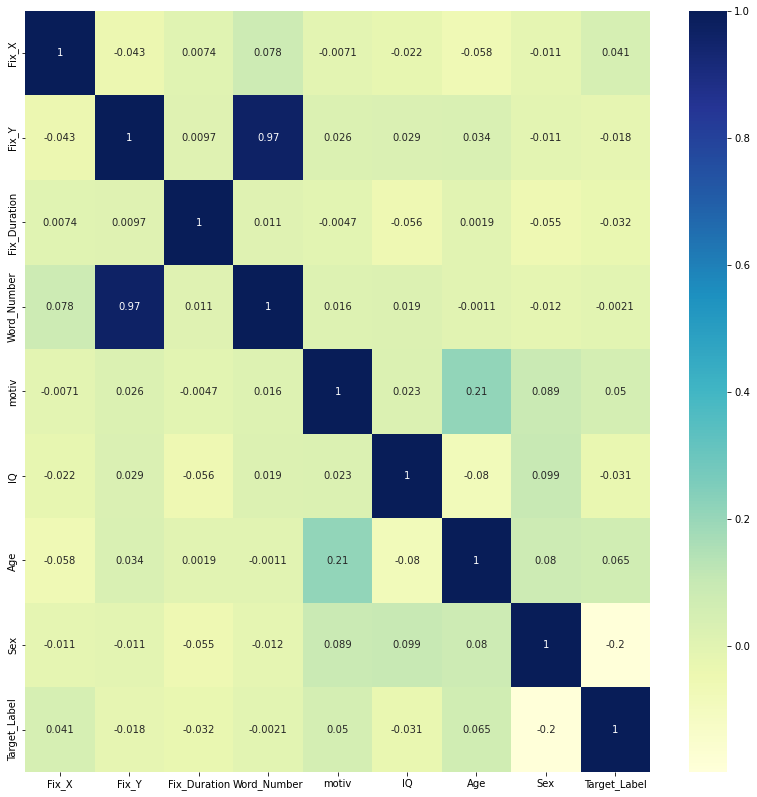

In [156]:

fig = plt.figure(figsize=(14, 14),)
sns.heatmap(
    data=correlations,
    xticklabels=correlations.columns,
    yticklabels=correlations.columns,
    cmap="YlGnBu",
    annot=True
)
plt.show()




- Significant correlations between:

    - Fix_Y and Word_Number
    - Age and Motiv
    




In [162]:

ages, motives, iqs = [], [], []
cefr = []
for subject_id in subject_ids:
    ages.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].Age)
    motives.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].motiv)
    iqs.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].IQ)
    cefr.append(ru_fix_demo.loc[ru_fix_demo.SubjectID == subject_id].iloc[0].Target_Label)
    

ages = np.asarray(ages)
motives = np.asarray(motives)
iqs = np.asarray(iqs)
cefr = np.asarray(cefr)

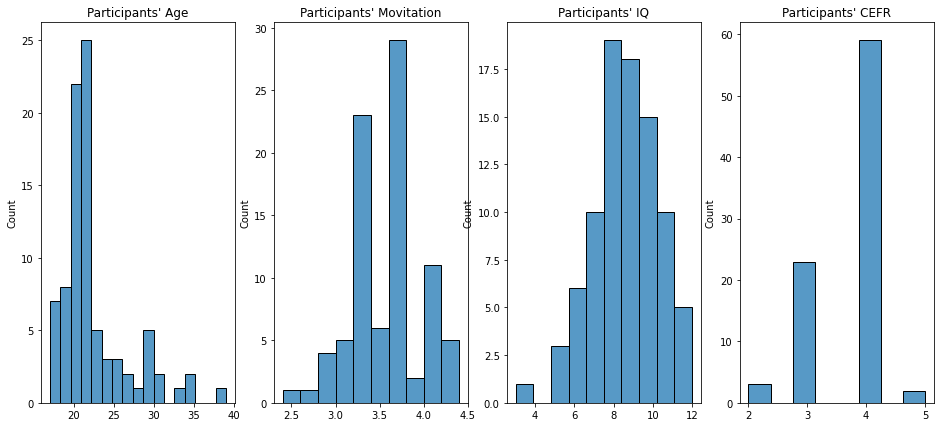

In [163]:

plt.figure(figsize=(16, 7))
plt.subplot(141)
sns.histplot(ages)
plt.title("Participants' Age")
plt.subplot(142)
sns.histplot(motives)
plt.title("Participants' Movitation")
plt.subplot(143)
sns.histplot(iq)
plt.title("Participants' IQ")
plt.subplot(144)
sns.histplot(cefr)
plt.title("Participants' CEFR")
plt.show()



In [135]:

labels = data.Target_Label.unique()
labels


array([4., 3., 5., 2.])

- The discrete target values are: **A1=0, A2=1, B1=2, B2=3, C1=4, C2=5** (CEFR level)

In [160]:

# seperating levels and gender (assuming that 1 represents being male?)

# A1 
a1 = data.loc[(data.Target_Label == 0.)]
a1_male = data.loc[(data.Target_Label == 0.) & (data.Sex == 1)]
a1_female = data.loc[(data.Target_Label == 0.) & (data.Sex == 0)]

# A2 
a2 = data.loc[(data.Target_Label == 1.)]
a2_male = data.loc[(data.Target_Label == 1.) & (data.Sex == 1)]
a2_female = data.loc[(data.Target_Label == 1.) & (data.Sex == 0)]

# B1
b1 = data.loc[(data.Target_Label == 2.)]
b1_male = data.loc[(data.Target_Label == 2.) & (data.Sex == 1)]
b1_female = data.loc[(data.Target_Label == 2.) & (data.Sex == 0)]

# B2
b2 = data.loc[(data.Target_Label == 3.)]
b2_male = data.loc[(data.Target_Label == 3.) & (data.Sex == 1)]
b2_female = data.loc[(data.Target_Label == 3.) & (data.Sex == 0)]


# C1
c1 = data.loc[(data.Target_Label == 4.)]
c1_male = data.loc[(data.Target_Label == 4.) & (data.Sex == 1)]
c1_female = data.loc[(data.Target_Label == 4.) & (data.Sex == 0)]


# C2
c2 = data.loc[(data.Target_Label == 5.)]
c2_male = data.loc[(data.Target_Label == 5.) & (data.Sex == 1)]
c2_female = data.loc[(data.Target_Label == 5.) & (data.Sex == 0)]




In [198]:



print("Participants Info: \n \n"
      f" A1 {a1.SubjectID.unique().shape[0]} :" 
      f" Male:{a1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{a1_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" A2 {a2.SubjectID.unique().shape[0]} :" 
      f" Male:{a2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{a2_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" B1 {b1.SubjectID.unique().shape[0]} :" 
      f" Male:{b1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{b1_female.SubjectID.unique().shape[0]} \n \n"    
      
      f" B2 {b2.SubjectID.unique().shape[0]}:" 
      f" Male:{b2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{b2_female.SubjectID.unique().shape[0]} \n \n"   
      
      
      f" C1 {c1.SubjectID.unique().shape[0]}:" 
      f" Male:{c1_male.SubjectID.unique().shape[0]} & " 
      f" Female:{c1_female.SubjectID.unique().shape[0]} \n \n"    
      
      
      f" C2 {c2.SubjectID.unique().shape[0]}:" 
      f" Male:{c2_male.SubjectID.unique().shape[0]} & " 
      f" Female:{c2_female.SubjectID.unique().shape[0]} \n \n"    
     )




Participants Info: 
 
 A1 0 : Male:0 &  Female:0 
 
 A2 0 : Male:0 &  Female:0 
 
 B1 3 : Male:2 &  Female:1 
 
 B2 23: Male:7 &  Female:16 
 
 C1 59: Male:13 &  Female:46 
 
 C2 2: Male:0 &  Female:2 
 



## Let us plot THE KDSs and dive in more details


In [222]:
b1.Fix_X.values

array([625, 144, 533, ..., 693, 811, 614])

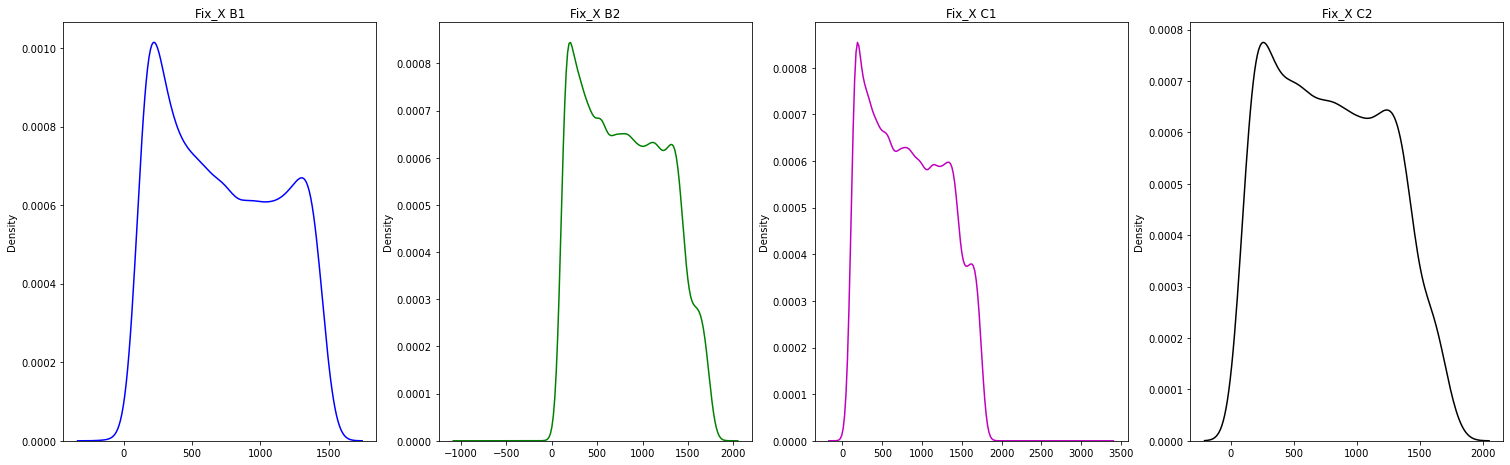

In [262]:


fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )


# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_X.values, color='b')
ax.set_title("Fix_X B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_X.values, color='g')
ax.set_title("Fix_X B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_X.values, color='m')
ax.set_title("Fix_X C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_X.values, color='k')
ax.set_title("Fix_X C2")

plt.show()

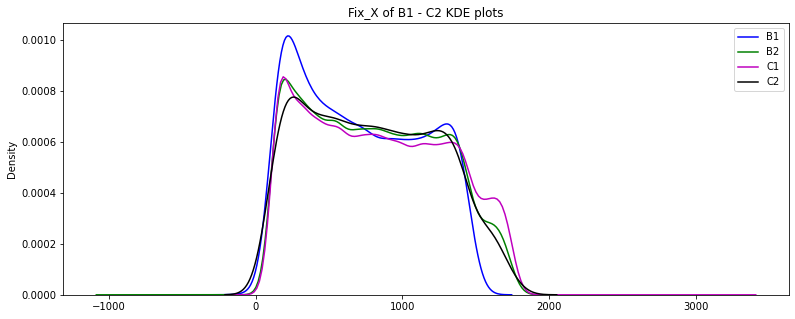

In [267]:


plt.figure(figsize=(13, 5))
plt.title("Fix_X of B1 - C2 KDE plots")
sns.kdeplot(b1.Fix_X.values, color='b')
sns.kdeplot(b2.Fix_X.values, color='g')
sns.kdeplot(c1.Fix_X.values, color='m')
sns.kdeplot(c2.Fix_X.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()



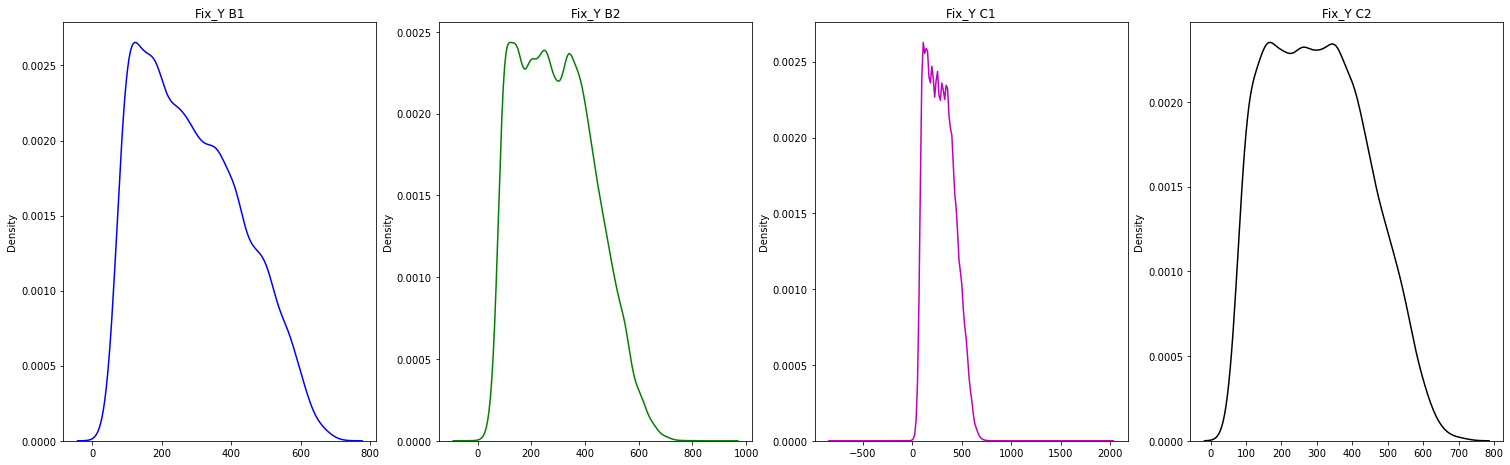

In [264]:


fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )



# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_Y.values, color='b')
ax.set_title("Fix_Y B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_Y.values, color='g')
ax.set_title("Fix_Y B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_Y.values, color='m')
ax.set_title("Fix_Y C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_Y.values, color='k')
ax.set_title("Fix_Y C2")

plt.show()



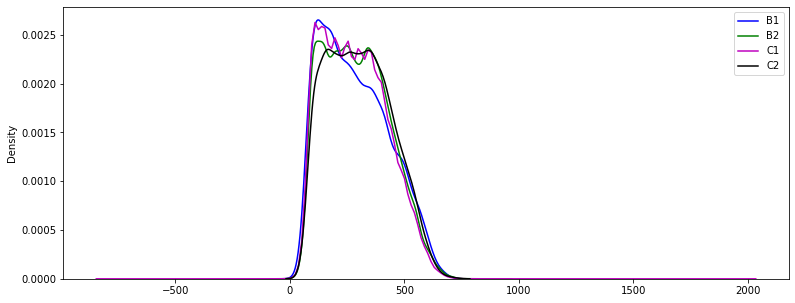

In [266]:


plt.figure(figsize=(13, 5))
sns.kdeplot(b1.Fix_Y.values, color='b')
sns.kdeplot(b2.Fix_Y.values, color='g')
sns.kdeplot(c1.Fix_Y.values, color='m')
sns.kdeplot(c2.Fix_Y.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()


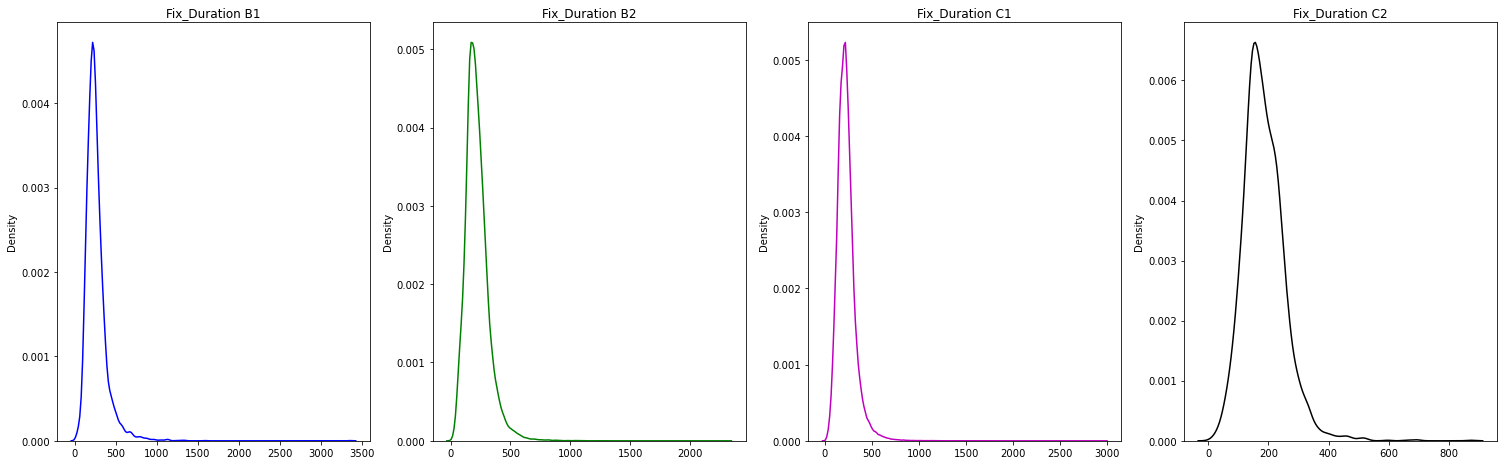

In [268]:




fig = plt.figure(figsize=(25, 7))
fig.subplots_adjust(left=0.1, bottom=0.05, )


# B1
ax = fig.add_subplot(141)
sns.kdeplot(b1.Fix_Duration.values, color='b')
ax.set_title("Fix_Duration B1")

# B2
ax = fig.add_subplot(142)
sns.kdeplot(b2.Fix_Duration.values, color='g')
ax.set_title("Fix_Duration B2")

# C1
ax = fig.add_subplot(143)
sns.kdeplot(c1.Fix_Duration.values, color='m')
ax.set_title("Fix_Duration C1")

# C2
ax = fig.add_subplot(144)
sns.kdeplot(c2.Fix_Duration.values, color='k')
ax.set_title("Fix_Duration C2")

plt.show()



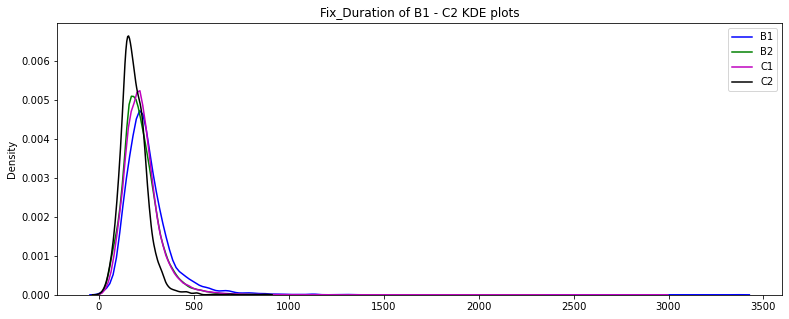

In [270]:




plt.figure(figsize=(13, 5))
plt.title("Fix_Duration of B1 - C2 KDE plots")
sns.kdeplot(b1.Fix_Duration.values, color='b')
sns.kdeplot(b2.Fix_Duration.values, color='g')
sns.kdeplot(c1.Fix_Duration.values, color='m')
sns.kdeplot(c2.Fix_Duration.values, color='k')
plt.legend(["B1", "B2", "C1", "C2"])
plt.show()
 

## Momentums

In [274]:


b1_male[["Fix_X", "Fix_Y", "Fix_Duration"]

,Fix_X,Fix_Y,Fix_Duration
110749,625,460,135
110750,144,88,388
110751,533,145,219
110752,1343,174,276
110753,857,128,278
...,...,...,...
130414,1027,511,740
130415,312,217,196
130416,1024,518,189
130417,1306,391,191


In [353]:


print("Target values 1st Momentum: \n \n"
      
      "Fix.      x-axis            y-axis            durarion \n"
    
      f" B1 {b1.SubjectID.unique().shape[0]} :" 
      f" {b1.Fix_X.mean():.3f}±{b1.Fix_X.std():.3f}  "
      f" {b1.Fix_Y.mean():.3f}±{b1.Fix_Y.std():.3f}  "
      f" {b1.Fix_Duration.mean():.3f}±{b1.Fix_Duration.std():.3f} \n"
      
      f" B2 {b2.SubjectID.unique().shape[0]}:" 
      f" {b2.Fix_X.mean():.3f}±{b2.Fix_X.std():.3f}  "
      f" {b2.Fix_Y.mean():.3f}±{b2.Fix_Y.std():.3f}  "
      f" {b2.Fix_Duration.mean():.3f}±{b2.Fix_Duration.std():.3f} \n"
      
      
      f" C1 {c1.SubjectID.unique().shape[0]}:" 
      f" {c1.Fix_X.mean():.3f}±{c1.Fix_X.std():.3f}  "
      f" {c1.Fix_Y.mean():.3f}±{c1.Fix_Y.std():.3f}  "
      f" {c1.Fix_Duration.mean():.3f}±{c1.Fix_Duration.std():.3f} \n"
    
      
      f" C2 {c2.SubjectID.unique().shape[0]} :" 
      f" {c2.Fix_X.mean():.3f}±{c2.Fix_X.std():.3f}  "
      f" {c2.Fix_Y.mean():.3f}±{c2.Fix_Y.std():.3f}  "
      f" {c2.Fix_Duration.mean():.3f}±{c2.Fix_Duration.std():.3f} \n"
      
      
     )

Target values 1st Momentum: 
 
Fix.      x-axis            y-axis            durarion 
 B1 3 : 715.500±412.154   286.085±145.289   257.852±132.278 
 B2 23: 804.637±447.674   292.871±138.090   221.711±99.189 
 C1 59: 829.856±466.421   283.818±136.968   226.901±99.766 
 C2 2 : 793.161±441.117   302.514±136.325   185.641±69.861 



In [ ]:

b1_male.Fix_X.std()